GitHub Link -  https://github.com/shriram7755/EDA_ON_HOTEL_BOOKING

## <b>This dataset presents booking details for both a city hotel and a resort hotel, encompassing factors like booking date, duration of stay, number of adults, children, and infants, as well as available parking spaces, among other variables. It offers an opportunity to delve into questions regarding the optimal timing for booking, ideal length of stay for favorable daily rates, and prediction of whether a hotel is prone to receiving a disproportionately high volume of special requests. With personally identifying information excluded, analyzing this dataset can unveil crucial factors shaping booking trends. </b>


 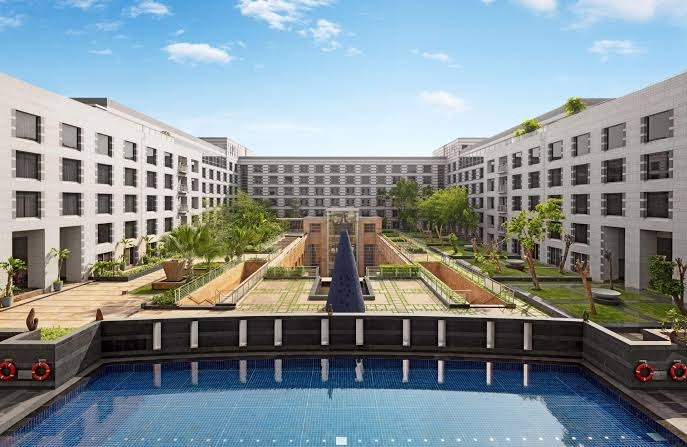

In [83]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [84]:
# Mounting the drive so that we can access the data
# from google.colab import drive
# drive.mount('/content/drive') #/content/drive/MyDrive/Almabetter/Data_Dir/

In [85]:
# Load the dataset
Hotel_booking_df = pd.read_csv('Hotel Bookings.csv')        

In [86]:
#let us check the data
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [87]:
#First 10 rows
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [88]:
#last 10 rows
Hotel_booking_df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [89]:
Hotel_booking_df.shape   # shape of the data(1,19,390-Rows and 32-columns)

(119390, 32)

In [90]:
Hotel_booking_df.columns                # list of columns present in the data

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [91]:
Hotel_booking_df.info()     # overview of data with column values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [92]:
Hotel_df = Hotel_booking_df.copy() #Creating a copy of original data with the required columns and it helps in maintaining the original dataframe.

# For understanding the data well renaming the 'adr' column name to 'Average_daily_rate' 

In [93]:
Hotel_df.rename(columns ={'adr' : 'Average_daily_rate'},inplace =True)

In [94]:
Hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [95]:
Hotel_df.describe() #This function  gives numerical information information

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [96]:
Hotel_df.isna().sum().sort_values(ascending =False)
# gives the count of null values in first all column

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
Average_daily_rate                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# As we saw there are null values in columns(agent, children,company,country). we are replacing missing values.

In [97]:
#Replacing null values

Hotel_df['children'].fillna(Hotel_df.children.mean(), inplace = True) 
# filling null values with the mean of children column

Hotel_df['children'] = Hotel_df['children'].astype(int)
#converting the data type of children column to int

Hotel_df['company'].fillna(0 , inplace = True)             
# filling null values with 0 for company column

Hotel_df['company'].astype(int)                            
#converting the data type of company column to int

Hotel_df['agent'].fillna(0 , inplace = True)               
# filling null values with 0 for agent column

Hotel_df['agent'].astype(int)                               
#converting the data type of agent column to int

Hotel_df['country'].fillna('Other',inplace = True)

# Removing duplicated rows

In [98]:
Hotel_df[Hotel_df.duplicated()].shape 
#There are 31994 Duplicate rows

(31994, 32)

In [99]:
Hotel_df.drop_duplicates(inplace = True)

# Now as we can see we dont have any null values in the data .

In [100]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int32  
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [101]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,Average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [102]:
Hotel_df[Hotel_df.adults + Hotel_df.babies + Hotel_df.children == 0].shape

(166, 32)

In [103]:
Hotel_df.drop(Hotel_df[Hotel_df.adults + Hotel_df.babies + Hotel_df.children == 0].index, inplace = True)  #Removing rows where total is 0.

In [104]:
Hotel_df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,Average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Removing outliers and adding some columns

Adding a column

In [105]:
Hotel_df['kids'] = Hotel_df.children + Hotel_df.babies           #creating new columns...........
Hotel_df['Full_stay'] = Hotel_df.stays_in_weekend_nights + Hotel_df.stays_in_week_nights

Removing an outlier from Average_daily_rate column

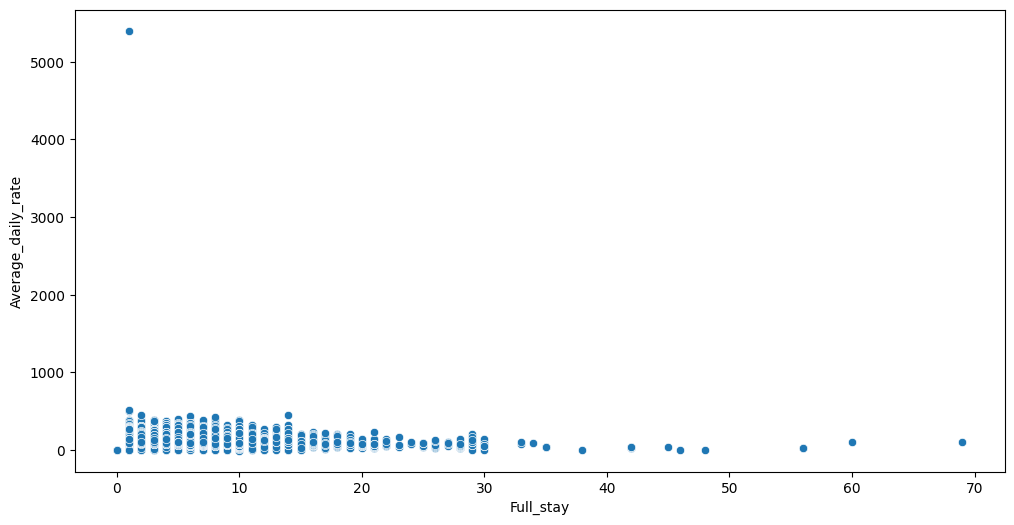

In [106]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()

In [107]:
Hotel_df.drop(Hotel_df[Hotel_df['Average_daily_rate'] > 5000].index, inplace = True) # Removing all values > 5000

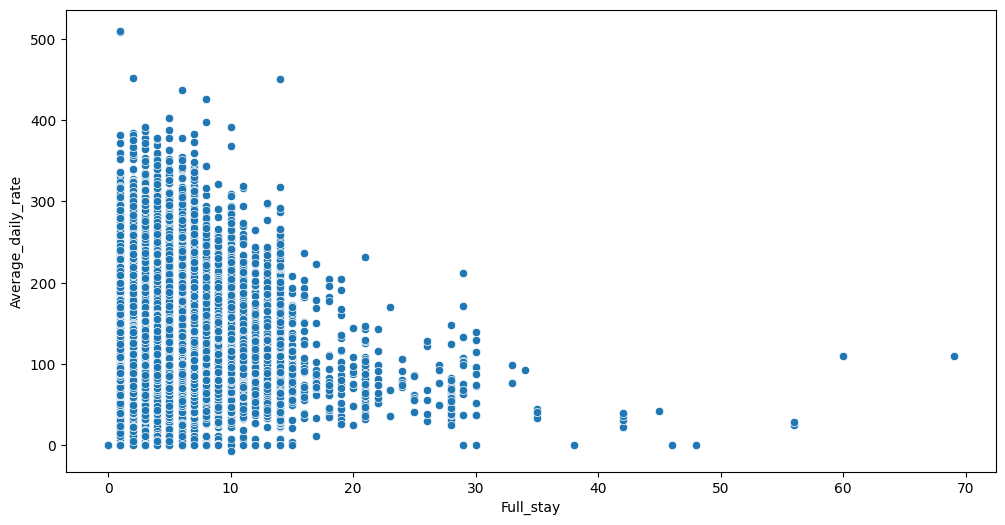

In [108]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'Average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()


From the scatter plot we can see that as length of Full_stay increases the Average_daily_rate decreases. This means for longer stay, the better deal(discounts) for customer can be finalised.

REmoving outliers from 'stays_in weekend_nights' and 'stays_in_week_nights

In [109]:
Hotel_df.loc[Hotel_df.stays_in_weekend_nights >= 5,'stays_in_weekend_nights']=  5  #greater than 5 stays are assigned to 5 stays
Hotel_df.loc[Hotel_df.stays_in_week_nights >= 10,'stays_in_week_nights']= 10 

adding new column

In [110]:
Hotel_df['Total_members'] = Hotel_df.adults + Hotel_df.children + Hotel_df.babies
Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20  #Removing outliers


In [111]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87229 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87229 non-null  object 
 1   is_canceled                     87229 non-null  int64  
 2   lead_time                       87229 non-null  int64  
 3   arrival_date_year               87229 non-null  int64  
 4   arrival_date_month              87229 non-null  object 
 5   arrival_date_week_number        87229 non-null  int64  
 6   arrival_date_day_of_month       87229 non-null  int64  
 7   stays_in_weekend_nights         87229 non-null  int64  
 8   stays_in_week_nights            87229 non-null  int64  
 9   adults                          87229 non-null  int64  
 10  children                        87229 non-null  int32  
 11  babies                          87229 non-null  int64  
 12  meal                            8722

Creating subset dataframes for 'City' and 'Resort' hotel data

In [112]:
City_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='Resort Hotel'])

Lets first find the correlation between the numerical data.
Also, we have added Full_stay and Total_members columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [113]:
Corr_df = Hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','Average_daily_rate','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

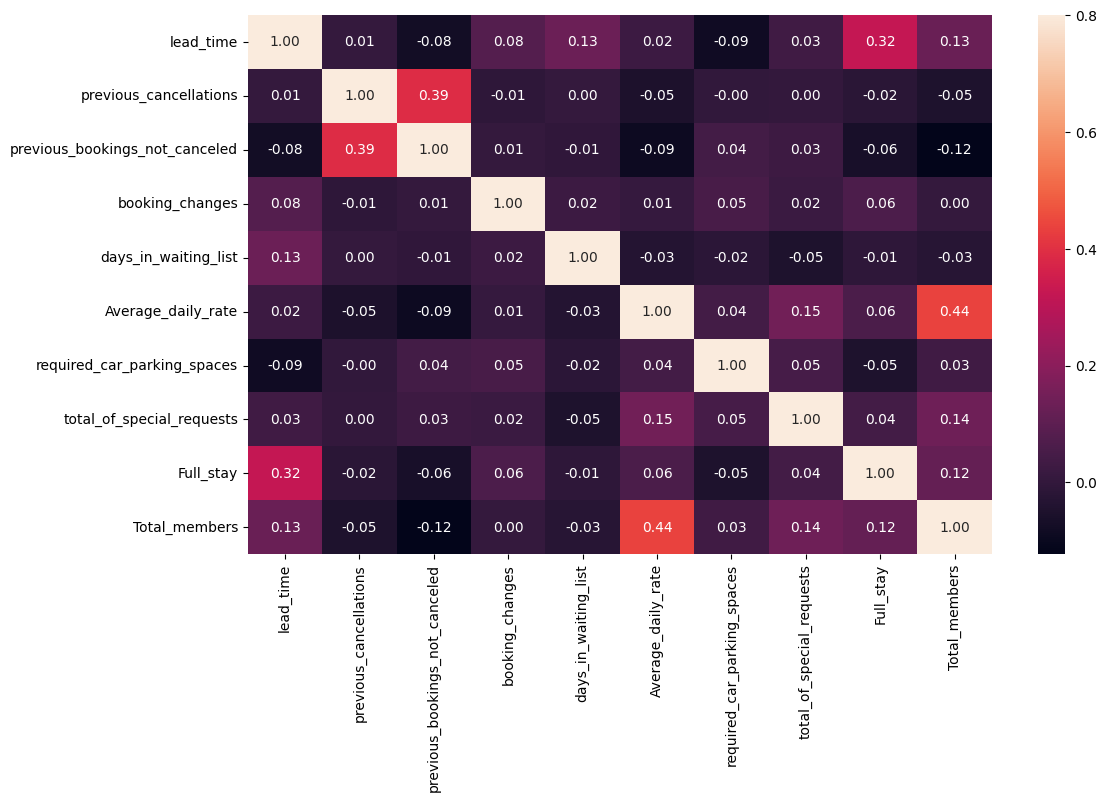

In [114]:
corr_mat = Corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,vmax=0.8,annot = True,fmt='.2f');

1-->Average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.

2-->Full_stay length and lead_time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival date.


#  EDA

# Data Preparation

In [115]:
# Data Preparation
hotel_counts = Hotel_df['hotel'].value_counts()
print(hotel_counts)

hotel
City Hotel      53273
Resort Hotel    33956
Name: count, dtype: int64


In [116]:
meal_counts = Hotel_df['meal'].value_counts()
meal_counts

meal
BB           67906
SC            9391
HB            9080
Undefined      492
FB             360
Name: count, dtype: int64

In [117]:
customer_type_counts = Hotel_df['customer_type'].value_counts()
customer_type_counts


customer_type
Transient          71861
Transient-Party    11692
Contract            3135
Group                541
Name: count, dtype: int64

In [118]:
parking_counts = Hotel_df['required_car_parking_spaces'].value_counts()
parking_counts

required_car_parking_spaces
0    79923
1     7273
2       28
3        3
8        2
Name: count, dtype: int64

Text(0.5, 1.0, 'Meal Type Preferences')

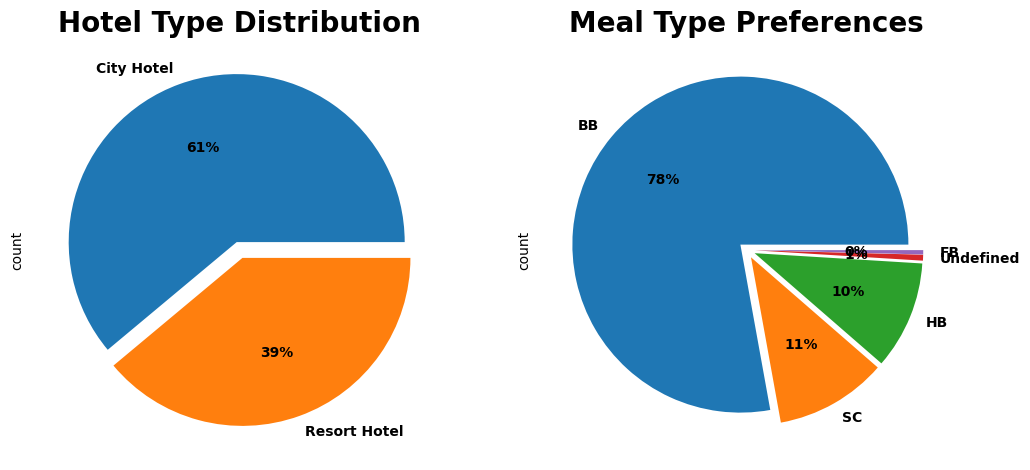

In [119]:
# Plotting hotel type distribution
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
hotel_counts.plot.pie(autopct='%1.0f%%', textprops={'weight': 'bold'}, explode=[0.05, 0.05])
plt.title('Hotel Type Distribution', fontweight="bold", size=20)

#--------------------------------------------------------------------------------------------------#
# Plotting meal type distribution
plt.subplot(2, 2, 2)
meal_counts.plot.pie(autopct='%1.0f%%', textprops={'weight': 'bold'}, explode=[0.05] * len(meal_counts))
plt.title('Meal Type Preferences', fontweight="bold", size=20)



Hotel Type Distribution:

* The majority of guests, 61%, prefer staying at city hotels.
* Resort hotels are less popular, with 39% of guests choosing this type.

Meal Type Preferences:

* A significant majority, 78%, of guests prefer the "Bed and Breakfast" (BB) meal type.
* Self Catering" (SC) is the next most popular option, chosen by 11% of guests.
* Half Board" (HB) is preferred by 10% of guests.
* The "Full Board" (FB) and "Undefined" meal types are the least popular, with each being chosen by less than 1% of guests.



Text(0.5, 1.0, 'Required Parking Spaces')

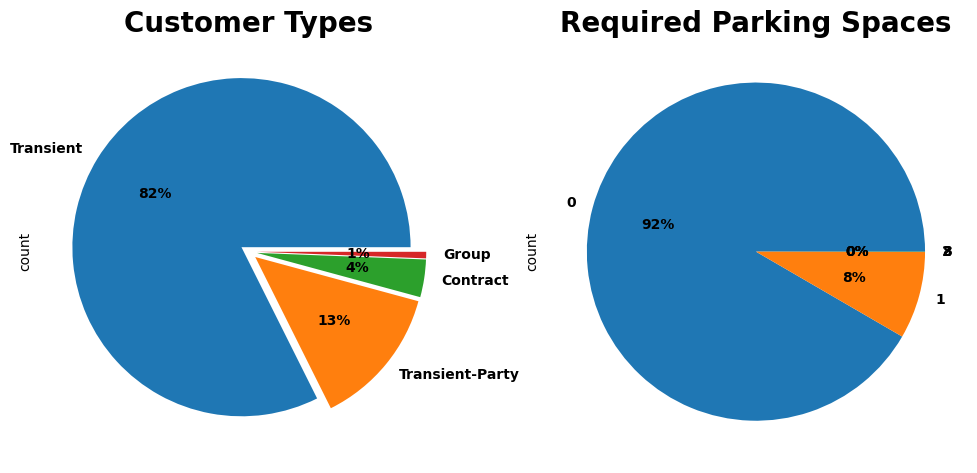

In [120]:
# Plotting customer type distribution
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
customer_type_counts.plot.pie(autopct='%1.0f%%', textprops={'weight': 'bold'}, explode=[0.05] * len(customer_type_counts))
plt.title('Customer Types', fontweight="bold", size=20)

# Plotting required parking spaces
plt.subplot(1, 2, 2)
parking_counts.plot.pie(autopct='%1.0f%%', textprops={'weight': 'bold'})
plt.title('Required Parking Spaces', fontweight="bold", size=20)

1-->There are 4 types of Customer. Out of them most are 'Transient Type"

2-->only 8% people require parking spaces

# Hotel Wise Bookings based on Date Month and year

In [121]:
# Analyzing booking trends by month
city_month_counts = City_df['arrival_date_month'].value_counts().reindex(months)
city_month_counts

arrival_date_month
January      2724
February     3591
March        4832
April        5072
May          5402
June         4997
July         5730
August       6576
September    4232
October      4197
November     2922
December     2998
Name: count, dtype: int64

In [122]:
resort_month_counts = Resort_df['arrival_date_month'].value_counts().reindex(months)
resort_month_counts

arrival_date_month
January      1961
February     2492
March        2656
April        2828
May          2942
June         2759
July         4313
August       4666
September    2450
October      2724
November     2051
December     2114
Name: count, dtype: int64

Text(0.5, 1.0, 'Bookings by Year')

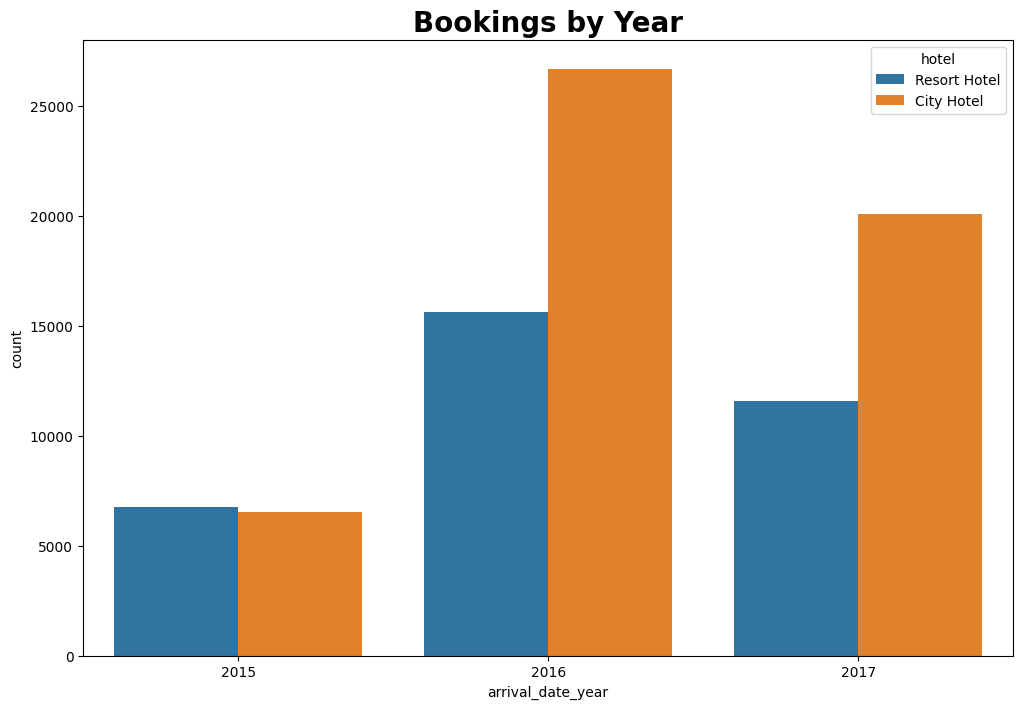

In [123]:
Hotel_df['arrival_date_month'] = pd.Categorical(Hotel_df['arrival_date_month'], categories=months, ordered=True)
plt.figure(figsize=(12, 8))
sns.countplot(x='arrival_date_year', data=Hotel_df, hue='hotel').set_title('Bookings by Year', fontweight="bold", size=20)

i  >Bookings for city hotels are higher than resort hotels over the years and  in year 2016 the bookings for both the hotels were maximum.

ii >Most bookings were done in the month of May,June, July, August.


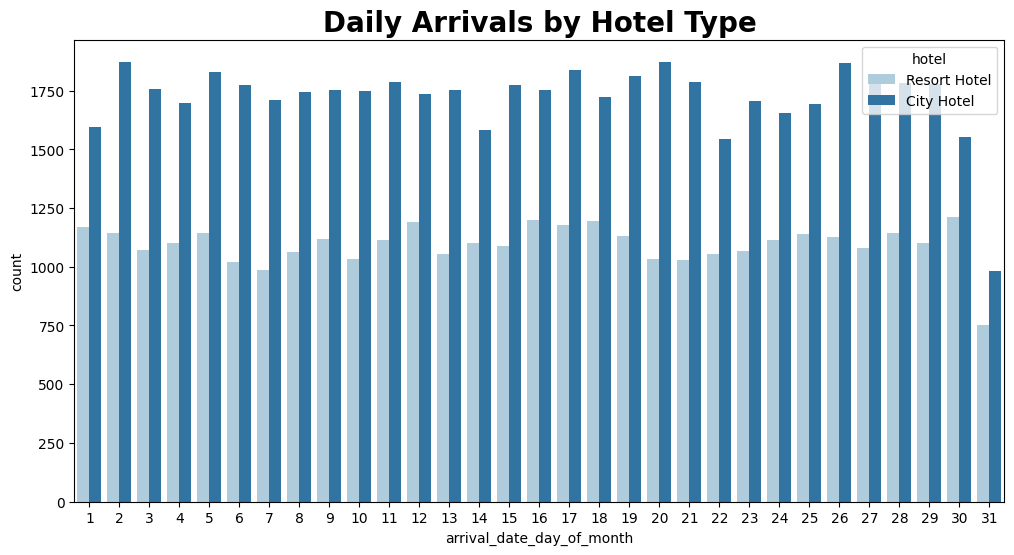

In [124]:
# Monthly booking trends
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_day_of_month', data=Hotel_df, hue='hotel', palette='Paired')
plt.title('Daily Arrivals by Hotel Type', fontweight="bold", size=20)
plt.show()

1 Overall Trend:

* City hotels consistently have higher daily arrivals compared to resort hotels throughout the month.

2 Daily Fluctuations:

* City hotels exhibit relatively stable arrival numbers each day, with most days showing between 1500 to 2000 arrivals.
* Resort hotels show more variation, with daily arrivals typically ranging between 1000 and 1500, occasionally approaching 1750.

3 Peak Days:

* There are noticeable peaks in arrivals at city hotels on certain days (e.g., 2nd, 6th, 8th, 10th, 17th, 28th, and 29th of the month) where the count exceeds 1750.
* Resort hotels also experience peaks on these days, but the increases are less pronounced compared to city hotels.
  End of Month Drop:

*  Both hotel types show a significant drop in arrivals on the 31st day of the month, which could be due to it being the end of the month.

4 End of Month Drop:

* Both hotel types show a significant drop in arrivals on the 31st day of the month, which could be due to it being the end of the month.

In [125]:
# Analyzing guest distribution by month


Text(0, 0.5, 'Number of guest')

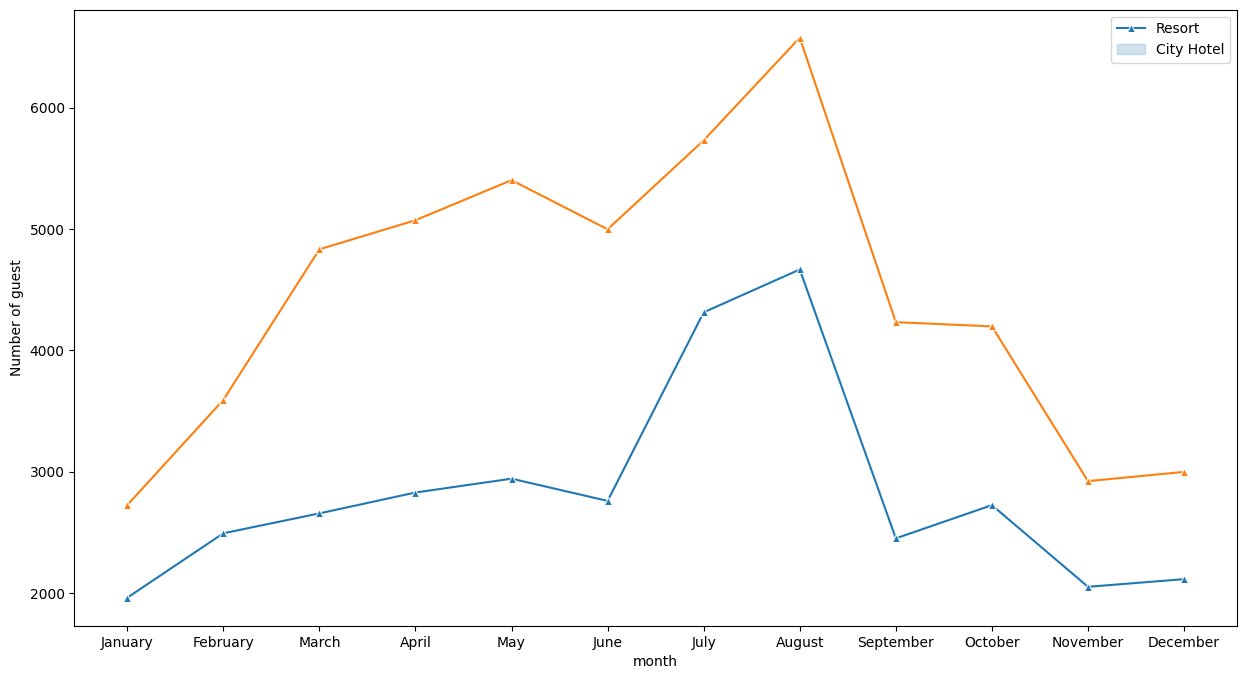

In [126]:
resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = City_df['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest, on = 'month')                              #merge resort guest and city guest month wise
final_guest.columns=['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)

#Which month get most visitors?
plt.figure(figsize =(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort', marker ='^')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel',marker ='^')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')

As we have seen above the busiest months for both the hotels are May,june ,july,August.

* Overall, there seems to be a seasonal trend in the number of visitors, with more visitors in the summer months (June, July, August) and fewer visitors in the winter months (December, January, February). This could be because the resort city is a popular vacation destination during the summer.

* It appears that the resort tends to be more popular than the city hotel throughout the year. This could be because the resort offers more amenities or is located in a more desirable location.

* In the summer months, the number of visitors to the resort is much higher than the number of visitors to the city hotel. This suggests that the resort is a particularly popular destination for summer vacations.

# From which place the most guests are coming ?

Text(0.5, 1.0, 'Number of bookings country wise')

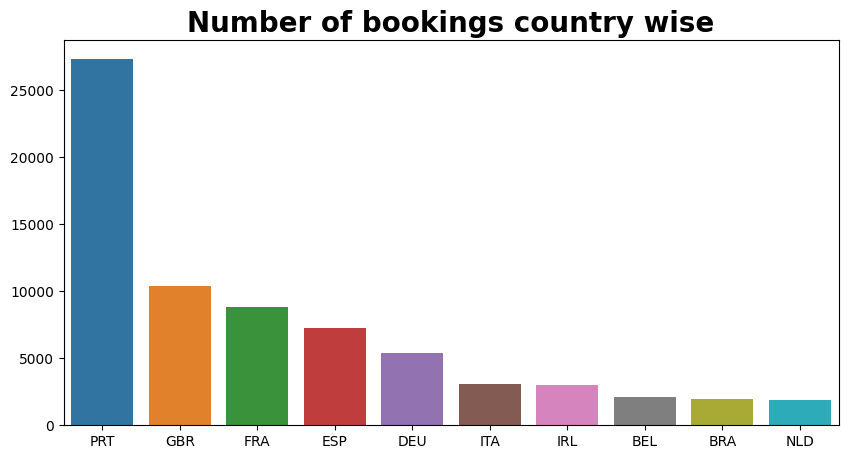

In [127]:
plt.figure(figsize = (10,5))

sns.barplot (y= list(Hotel_df.country.value_counts().head (10)), x= list(Hotel_df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)

#list(Hotel_df.country.value_counts().head (10))-->[48590, 12129, 10415, 8568, 7287, 3766, 3375, 2342, 2224, 2104]
#list(Hotel_df.country.value_counts().head(10).index)-->['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']

Most guest are from Portugal and other Europian contries.
And Less no of guest come from Nagaland

#Adults and kids

In [128]:
City_df['kids'].value_counts()

kids
0     48039
1      3128
2      2023
3        81
10        1
9         1
Name: count, dtype: int64

In [129]:
Resort_df['kids'].value_counts()

kids
0     30087
1      2149
2      1690
3        29
10        1
Name: count, dtype: int64

In [130]:
Hotel_df['adults'].value_counts()

adults
2     64496
1     16503
3      5935
0       219
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

# Total Members Countplot

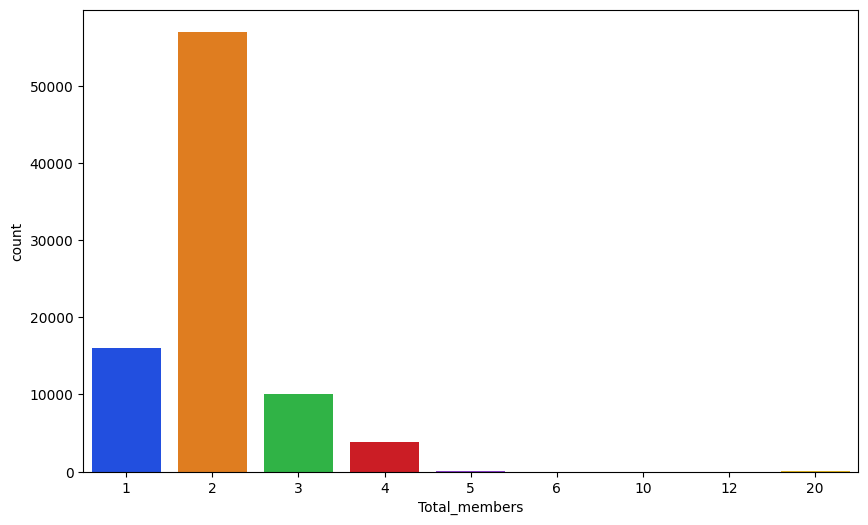

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Hotel_df is already defined
# Remove outliers
Hotel_df.loc[Hotel_df['Total_members'] > 20, 'Total_members'] = 20

# Plot a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_members', data=Hotel_df, palette='bright')
# If you need to remove a legend
#plt.gca().get_legend().remove()

plt.show()


Most guests prefer to come as pair of 2 Adults.
And Its count above 50000

# Which agent made the maximum bookings?

In [132]:
agent_counts = Hotel_df['agent'].value_counts(dropna=False).index
a=agent_counts[:6]
a

Index([9.0, 240.0, 0.0, 14.0, 7.0, 250.0], dtype='float64', name='agent')

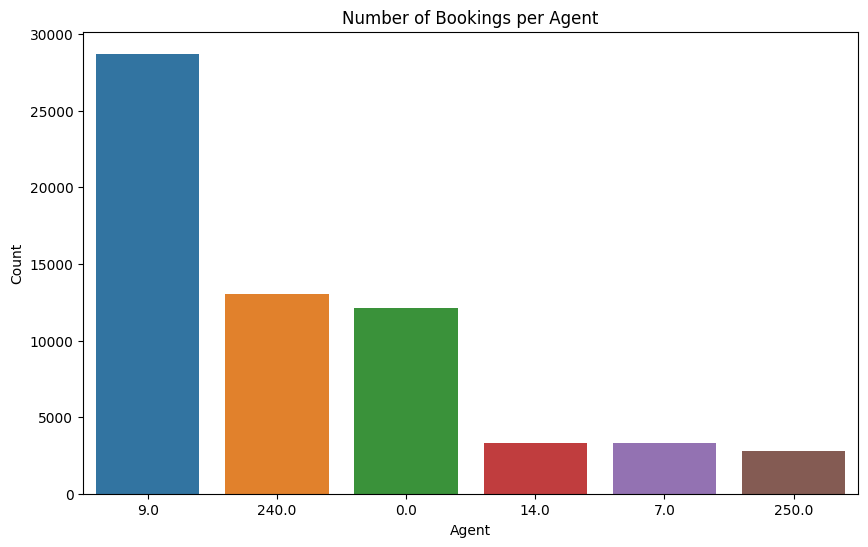

In [133]:
# Bar plot to visualize number of bookings per agent
plt.figure(figsize=(10, 6))
sns.countplot(data=Hotel_df, x="agent", order=a)
plt.title("Number of Bookings per Agent")
plt.xlabel("Agent")
plt.ylabel("Count")
plt.show()

Agent no. 9 has made most no. of bookings.

# Most preferred Room type

<Axes: xlabel='assigned_room_type', ylabel='Average_daily_rate'>

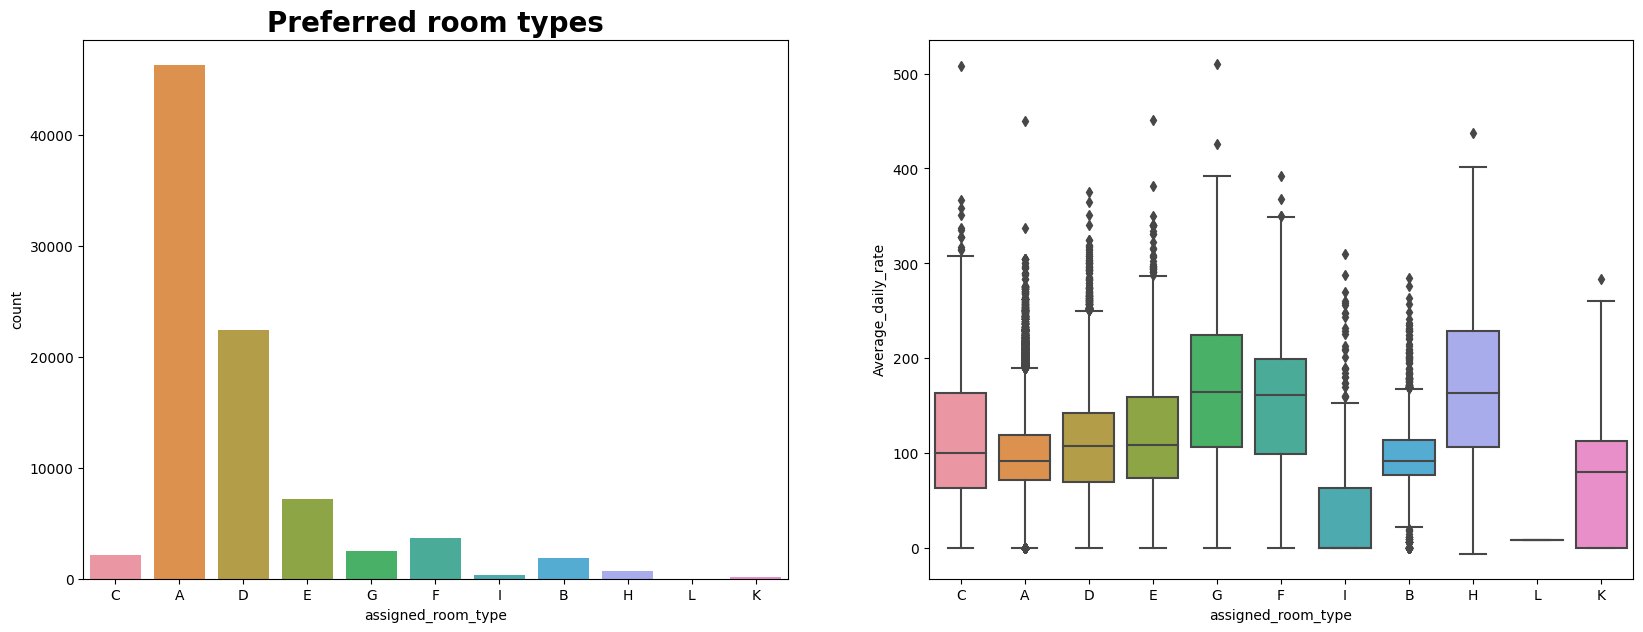

In [134]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot( x = Hotel_df['assigned_room_type'])
plt.title('Preferred room types',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.boxplot(x = Hotel_df['assigned_room_type'], y = Hotel_df['Average_daily_rate'])

Room type A and D are most preferred by guests.

but better 'Average daily rate' rooms are of type H,G,F and C.

# Stay_length in hotels

Text(0.5, 1.0, 'Stay length in hotels')

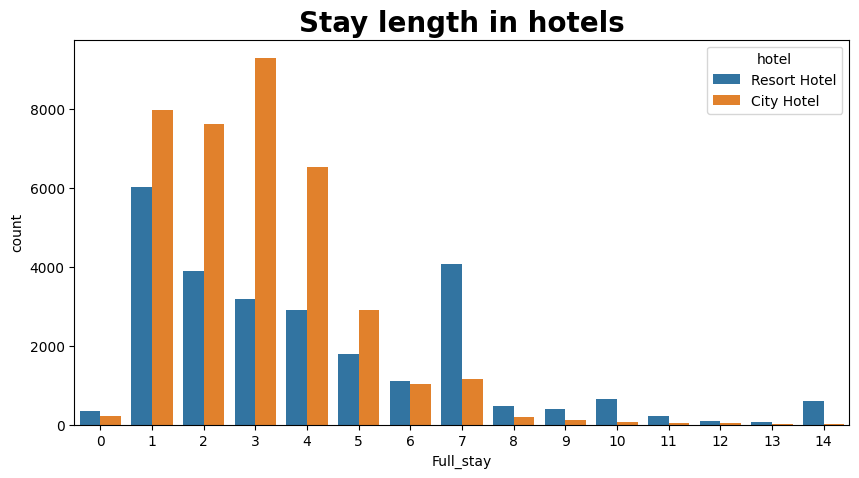

In [135]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]         #limiting full stay to less than 15
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontweight="bold", size=20)

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Text(0.5, 1.0, 'Number of stays on weekday nights')

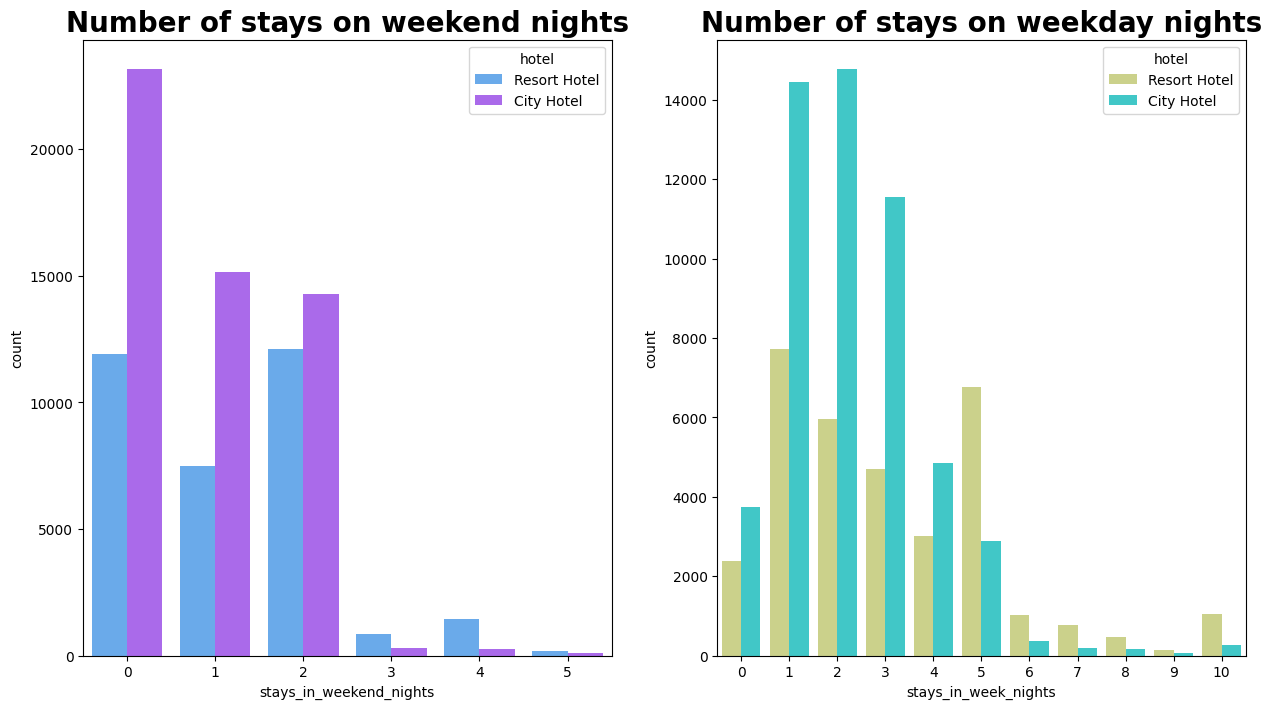

In [136]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=Hotel_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=Hotel_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

city hotels have more number of stays irrespective of week or weekend stays.

<Axes: xlabel='Full_stay', ylabel='Average_daily_rate'>

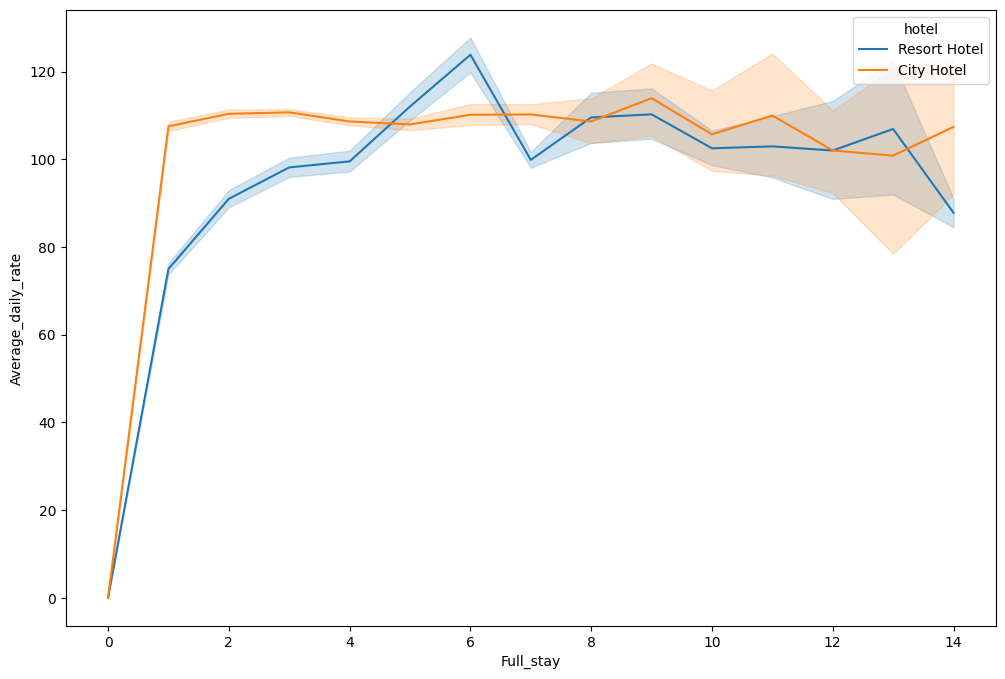

In [137]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]        #taking less than 15 days of Full stay
plt.figure(figsize =(12,8))
sns.lineplot(data = Hotel_df, x = s1['Full_stay'], y = 'Average_daily_rate', hue = 'hotel')


After 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel you should plan a stay of 6-7 days.
For city hotels is almost constant. And Average_daily_rate goes down after 14 days(long stay).

# Cancellation rates

Text(0.5, 1.0, 'Booking preferred with deposite type')

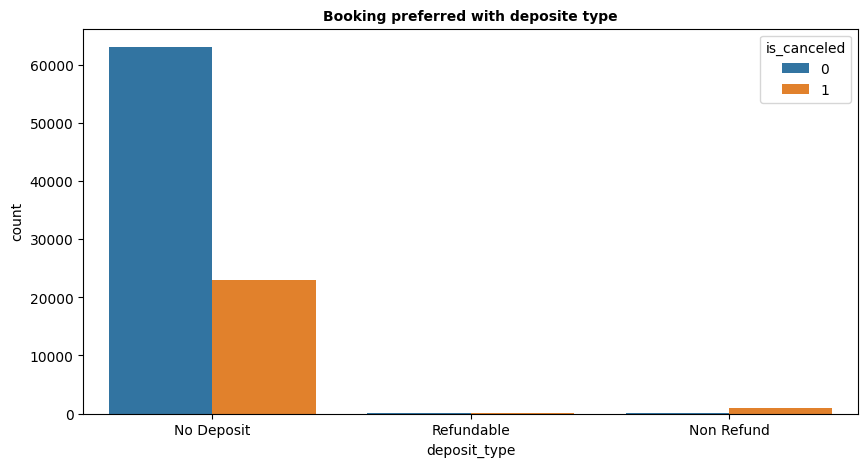

In [138]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontweight ="bold",size =10)

As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings

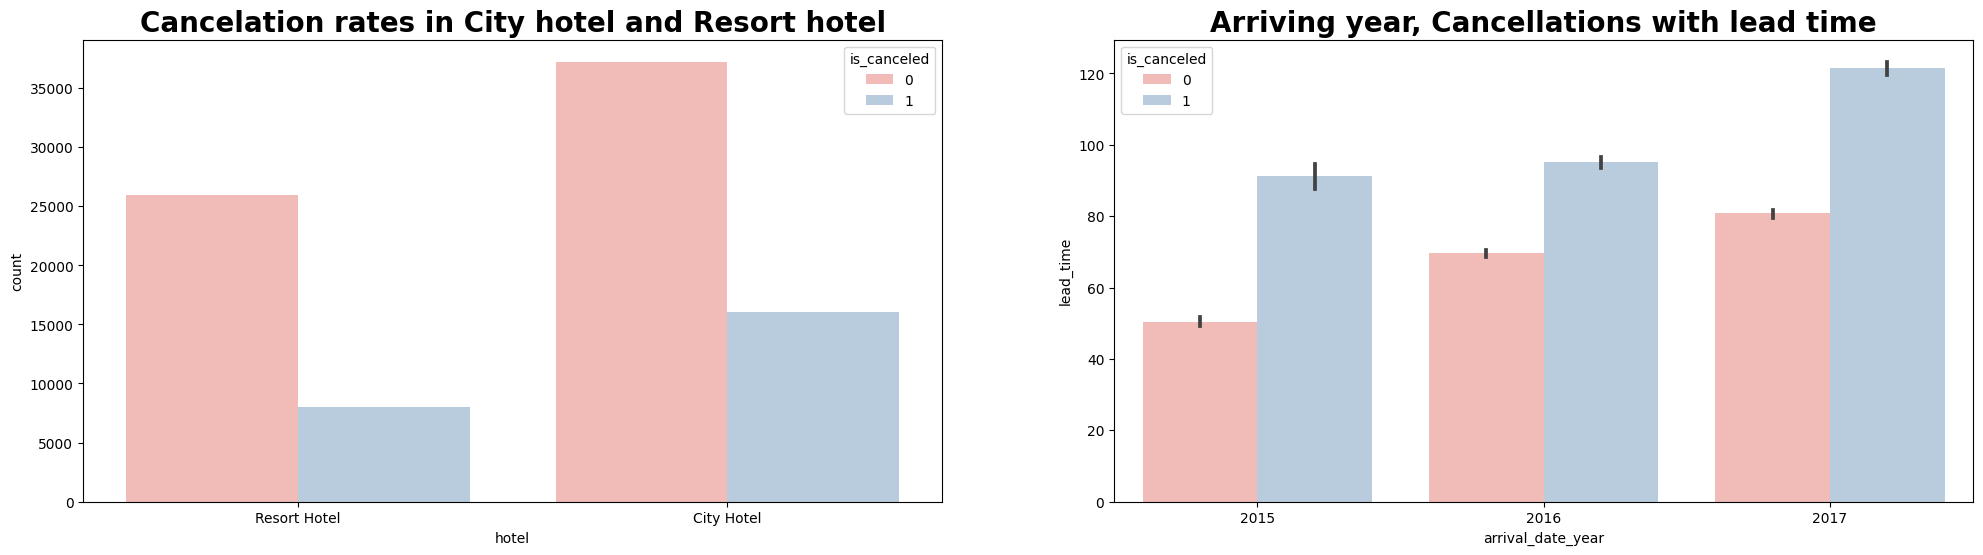

In [139]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

* Cancelation rate is higher in city hotel. 
* With more lead time there is more possibility of booking cancellation.

# Waiting time

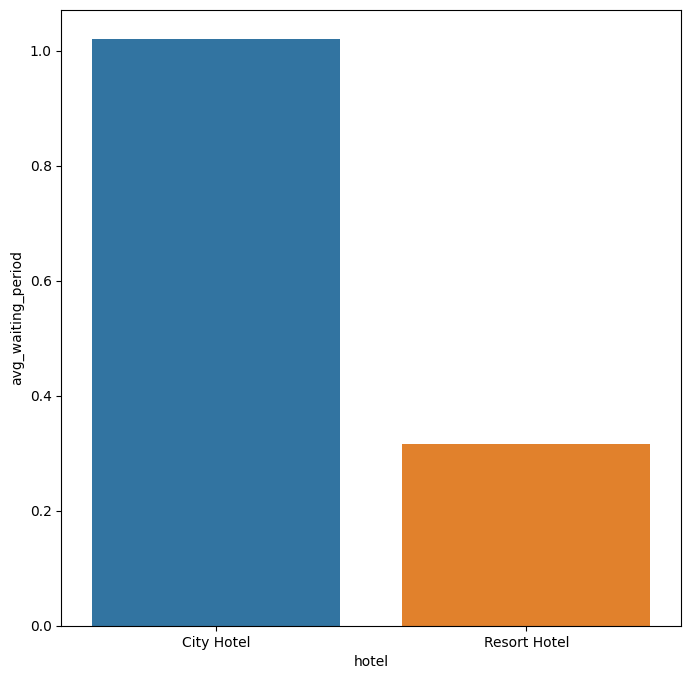

In [140]:
grouped_by_hotel = Hotel_df.groupby('hotel') #creating a DF which store groupby 'Hotel' rows
# waiting_df which stores mean of days in waiting list column
Waiting_df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,8))
sns.barplot(x = Waiting_df['hotel'], y = Waiting_df['avg_waiting_period'] )
plt.show()


City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

# Average_daily_rate and price

Text(0.5, 1.0, 'Average daily rate month wise')

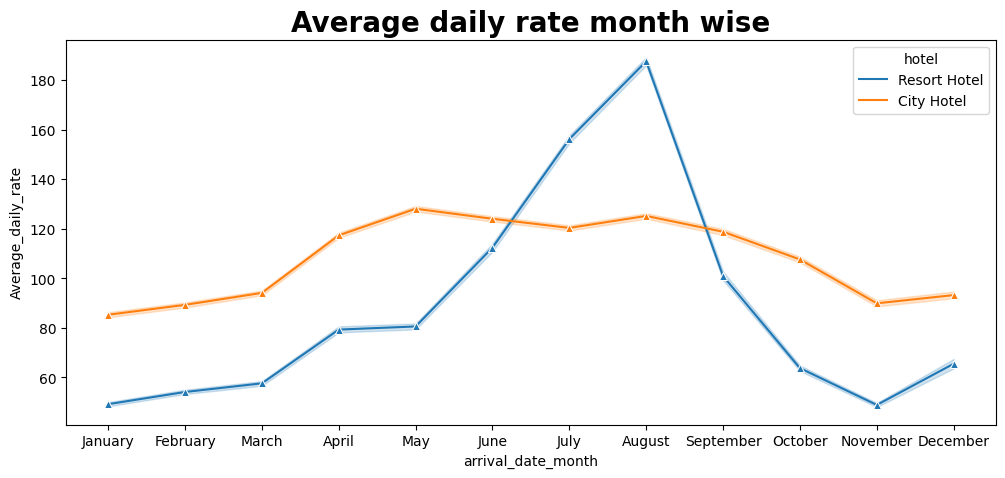

In [141]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_df, x = 'arrival_date_month', y = 'Average_daily_rate', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

C:\Users\SHRI\AppData\Local\Temp\ipykernel_14208\1006064627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Full_stay'])


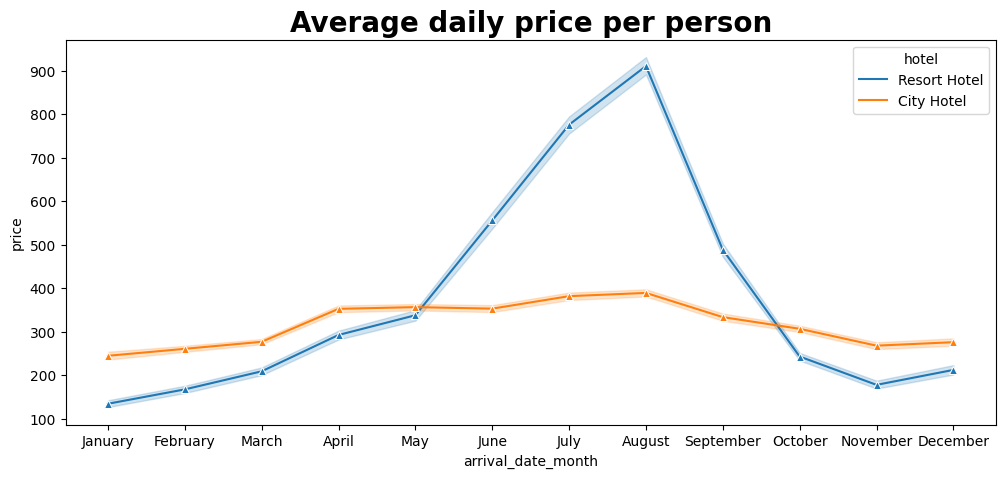

In [142]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
Hotel_df['Average_Daily_rate_pp'] = Hotel_df['Average_daily_rate'] / (Hotel_df['adults'] + Hotel_df['children'])
Actual_guests = Hotel_df.loc[Hotel_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['Average_daily_rate'] * (Actual_guests['Full_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', marker ='^')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

Prices of resort hotel are much higher during May,June,July,August,September

Prices of city hotel do not fluctuate that much.

# Special Requests

In [143]:
Hotel_df['total_of_special_requests'].value_counts()

total_of_special_requests
0    43788
1    28976
2    11795
3     2314
4      320
5       36
Name: count, dtype: int64

Text(0.5, 0, 'No. of special requests')

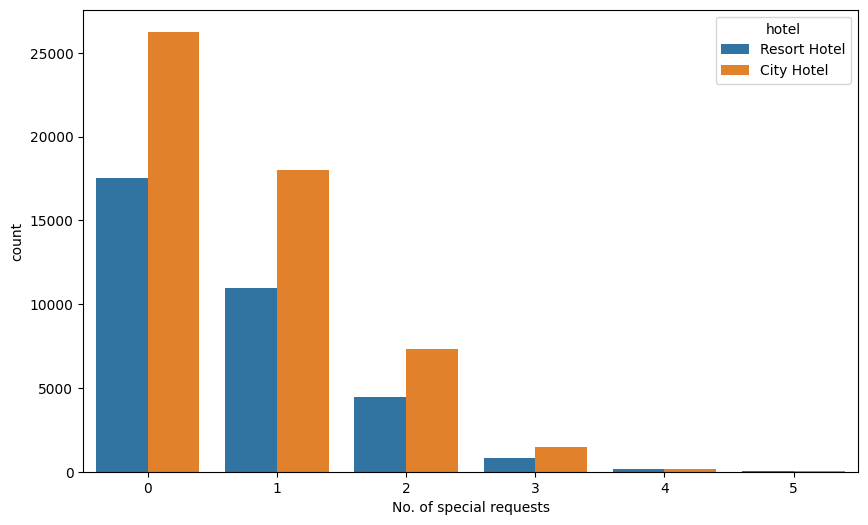

In [144]:
plt.figure(figsize =(10,6))
sns.countplot(data =Hotel_df,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests')

City hotels have more no. of special requests. Most of them ask for only 1 special request.

In [145]:
Hotel_df.Total_members.sum()

176868

176868 total members have been registered in the hotels

In [146]:
Hotel_df.required_car_parking_spaces.sum()

7354

7354 car Parking spaces have been used

# Conclusion:

* The majority of guests come from Western European countries. This suggests we should allocate a considerable portion of our budget to marketing in those regions.

* Approximately 61% of bookings are for the City hotel, while the Resort hotel accounts for 39%, indicating that the City hotel tends to be busier.

* Since most bookings are for the City hotel, it's crucial to dedicate the bulk of our marketing funds to promote these hotels.

* We should also focus our advertising efforts on the months from May to August, as these are peak times, largely due to the summer season.

* Given the low rate of returning guests, it would be wise to design our marketing campaigns to encourage more repeat visitors.

* The primary distribution channel, representing 80% of bookings, is through travel agencies or tour operators.

* Most guests tend to stay for fewer than four days, with a preference for the City hotel for shorter stays. However, when it comes to longer stays, the Resort hotel is generally more popular.

* Bookings are usually lower in November, December, February, and January, which means you can find rooms at lower rates during these months. To avoid the busiest times for hotel bookings, steer clear of May, June, July, and August.